In [2]:
pwd()

"/data3/yasu/capsid/docking_pairwise/1vb4_zdock_iter"

In [3]:
using Printf, DelimitedFiles
using Plots
using DataFrames
using Revise, MDToolbox

In [4]:
#using BSON: @save, @load
#@load "df.bson" df

In [5]:
using JLD2

df = load("df.jld2")["df"]

Row,fnames,score,omega,phi,prou,d,struc
,Any,Any,Any,Any,Any,Any,Any
1,1/complex.1.pdb,1212.62,"[-0.40211, 0.556162, 0.727318]",99.7607,"[33.9787, 31.7831, -5.51806]",-26.5796,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 13.54 49.83 15.17 |"
2,1/complex.2.pdb,1183.73,"[-0.315936, 0.200409, -0.927373]",177.03,"[-19.7002, 58.6909, 19.3948]",1.27308,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … -37.96 36.02 42.77 |"
3,1/complex.3.pdb,1135.3,"[0.00306483, -0.475415, -0.879756]",75.2811,"[0.242413, 4.8558, -2.6232]",-0.309525,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 42.96 34.11 55.31 |"
4,1/complex.4.pdb,1133.74,"[0.0539249, 0.0942512, -0.994087]",176.792,"[22.8572, 60.7278, 6.99761]",-0.859742,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 30.80 45.18 33.92 |"
5,1/complex.5.pdb,1122.77,"[-0.367839, -0.351645, 0.860837]",167.239,"[22.0496, 57.3307, 32.841]",-13.6955,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 33.42 46.63 17.32 |"
6,1/complex.6.pdb,1114.58,"[0.523125, 0.325591, -0.787611]",162.668,"[22.4456, 57.3706, 38.6247]",10.1998,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 42.83 51.74 33.42 |"
7,1/complex.7.pdb,1111.9,"[-0.376166, 0.58079, 0.721929]",114.399,"[32.0743, 29.743, -7.21562]",-26.919,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 11.94 49.09 15.03 |"
8,1/complex.8.pdb,1108.98,"[-0.261413, -0.320513, 0.910459]",172.943,"[21.9754, 56.3148, 26.1344]",4.0529,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 25.36 35.73 30.04 |"
9,1/complex.9.pdb,1107.44,"[0.0334642, -0.88584, -0.462782]",176.776,"[19.4078, -6.87396, 14.5613]",-0.526022,"1x2908 TrjArray{Float64, Int64}\n| 17.58 53.10 21.89 | … 21.84 55.25 67.71 |"


In [6]:
sort!(df, [:score], rev=true);
#dfs = vcat(df, df)
#sort!(dfs, [:score], rev=true)

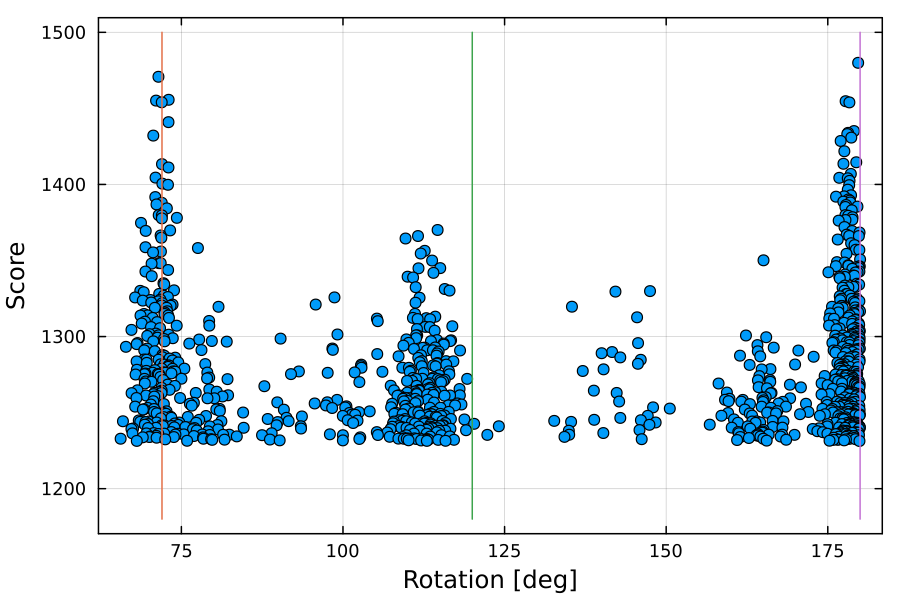

In [7]:
#pyplot()
plot(df.phi[1:1000], df.score[1:1000], seriestype=:scatter, dpi=250, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Score")
#s = collect(970:1350)
s = collect(1180:1500)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

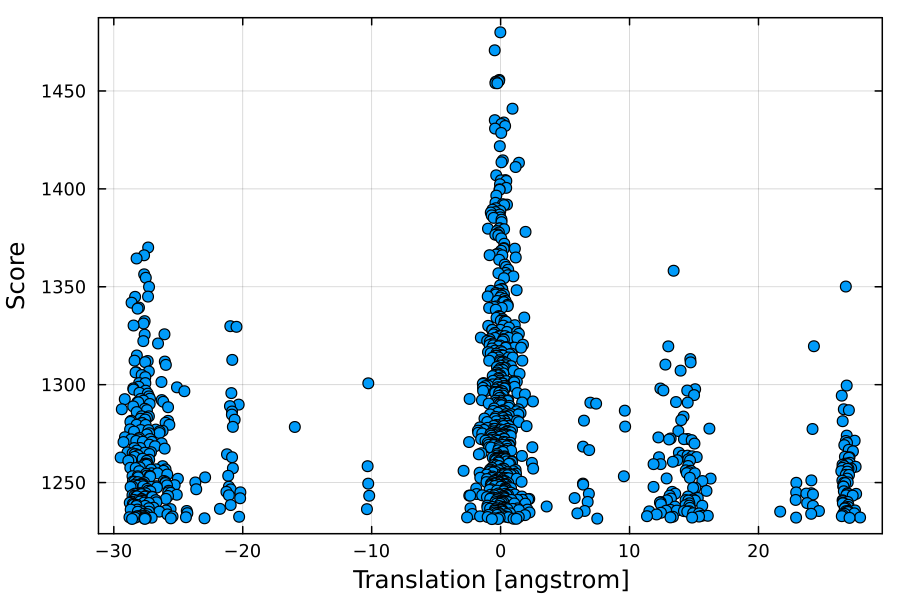

In [8]:
#pyplot()
plot(df.d[1:1000], df.score[1:1000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Translation [angstrom]"); yaxis!("Score")

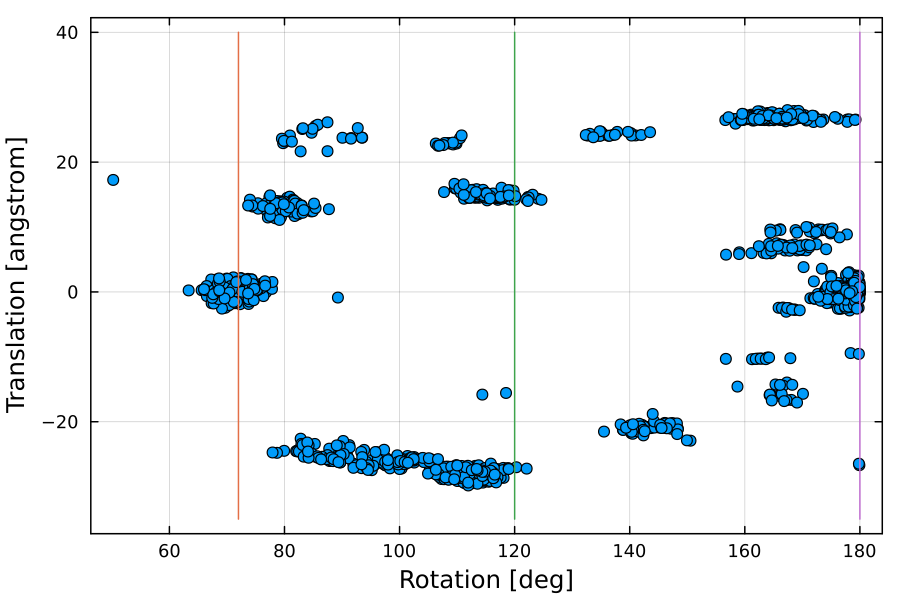

In [9]:
#pyplot()
plot(df.phi[1:2000], df.d[1:2000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Translation [angstrom]")
s = collect(-35:40)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

In [10]:
function create_heatmap(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = maximum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap (generic function with 1 method)

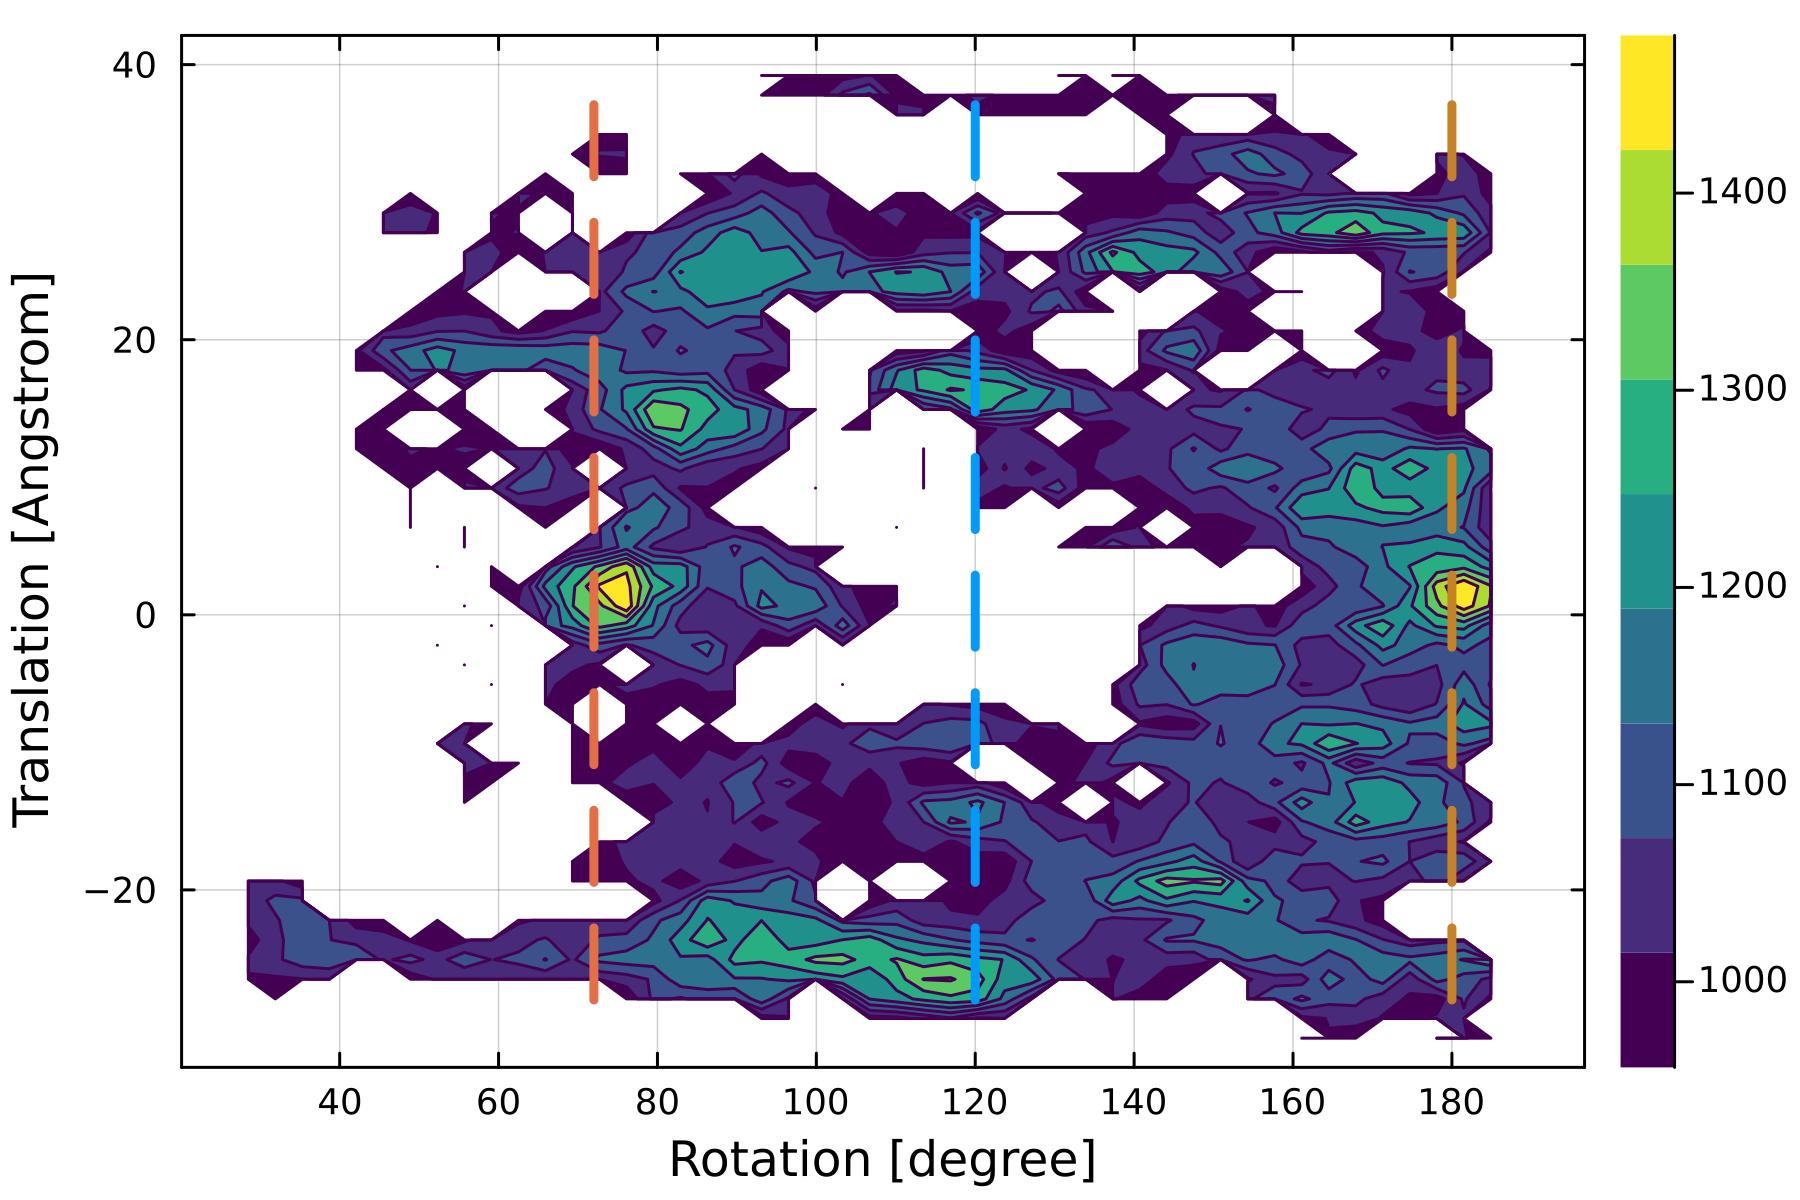

In [28]:
n = 100000
F = create_heatmap(df.phi[1:n], df.d[1:n], df.score[1:n], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:viridis,  
     st=:contourf, levels=range(minimum(F.z[F.z .> -Inf]), maximum(F.z), 10))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-28:40)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [29]:
savefig(p, "heatmap_score.png")
savefig(p, "heatmap_score.pdf")

"/data3/yasu/capsid/docking_pairwise/1vb4_zdock_iter/heatmap_score.pdf"

In [13]:
function create_heatmap_min(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = minimum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap_min (generic function with 1 method)

In [14]:
using Combinatorics

function compute_rmsd_permute(ref, t, nmer)
    natom = Int(t.natom / nmer)
    nmer_ref = Int(ref.natom / natom)
    index_pairs = collect(permutations(1:nmer_ref, nmer))
    rmsd = Inf64
    for index in index_pairs
        id = Vector{Int}(undef, 0)
        for imer = 1:nmer
            id = [id; (natom*(index[imer]-1)+1):(natom * index[imer])]
        end
        ref2 = ref[:, id]
        t2 = superimpose(ref2, t)
        r = compute_rmsd(ref2, t2)
        if r[1] < rmsd
            rmsd = r[1]
        end
    end
    return rmsd
end

compute_rmsd_permute (generic function with 1 method)

In [15]:
t = mdload("ref.pdb")
t = t["atomname CA"]
ref = t[1, :]
for imer = 2:60
    ref = hcat(ref, t[imer, :])
end
ref

1x11760 TrjArray{Float64, Int64}
| A                          |  …   A                          |
| 73GLY                      |  …   268ASN                     |
| 2CA                        |  …   86761CA                    |
|    37.85    -8.57    47.72 |  …     -32.06   -69.71   -25.35 |

In [16]:
function read_ascii(fname)
    lines = readlines(fname)
    natom = length(lines) - 1
    xyz = zeros(Float64, 1, natom*3)
    for i = 1:natom
        xyz[1, 3*(i-1)+1] = parse(Float64, lines[i+1][31:38])
        xyz[1, 3*(i-1)+2] = parse(Float64, lines[i+1][39:46])
        xyz[1, 3*(i-1)+3] = parse(Float64, lines[i+1][47:54])
    end
    TrjArray(xyz=xyz)
end

read_ascii (generic function with 1 method)

In [17]:
ntop = 3000
rmsd = zeros(Float64, ntop)
t = mdload("1/complex.1.pdb")
id = select_atom(t, "atomname CA")

for i in 1:ntop
    filename = df.fnames[i]
    t = read_ascii(filename)
    t_ca = t[:, id]
    rmsd[i] = compute_rmsd_permute(ref, t_ca, 2)
end

More than 50 iterations needed!More than 50 iterations needed!More than 50 iterations needed!More than 50 iterations needed!

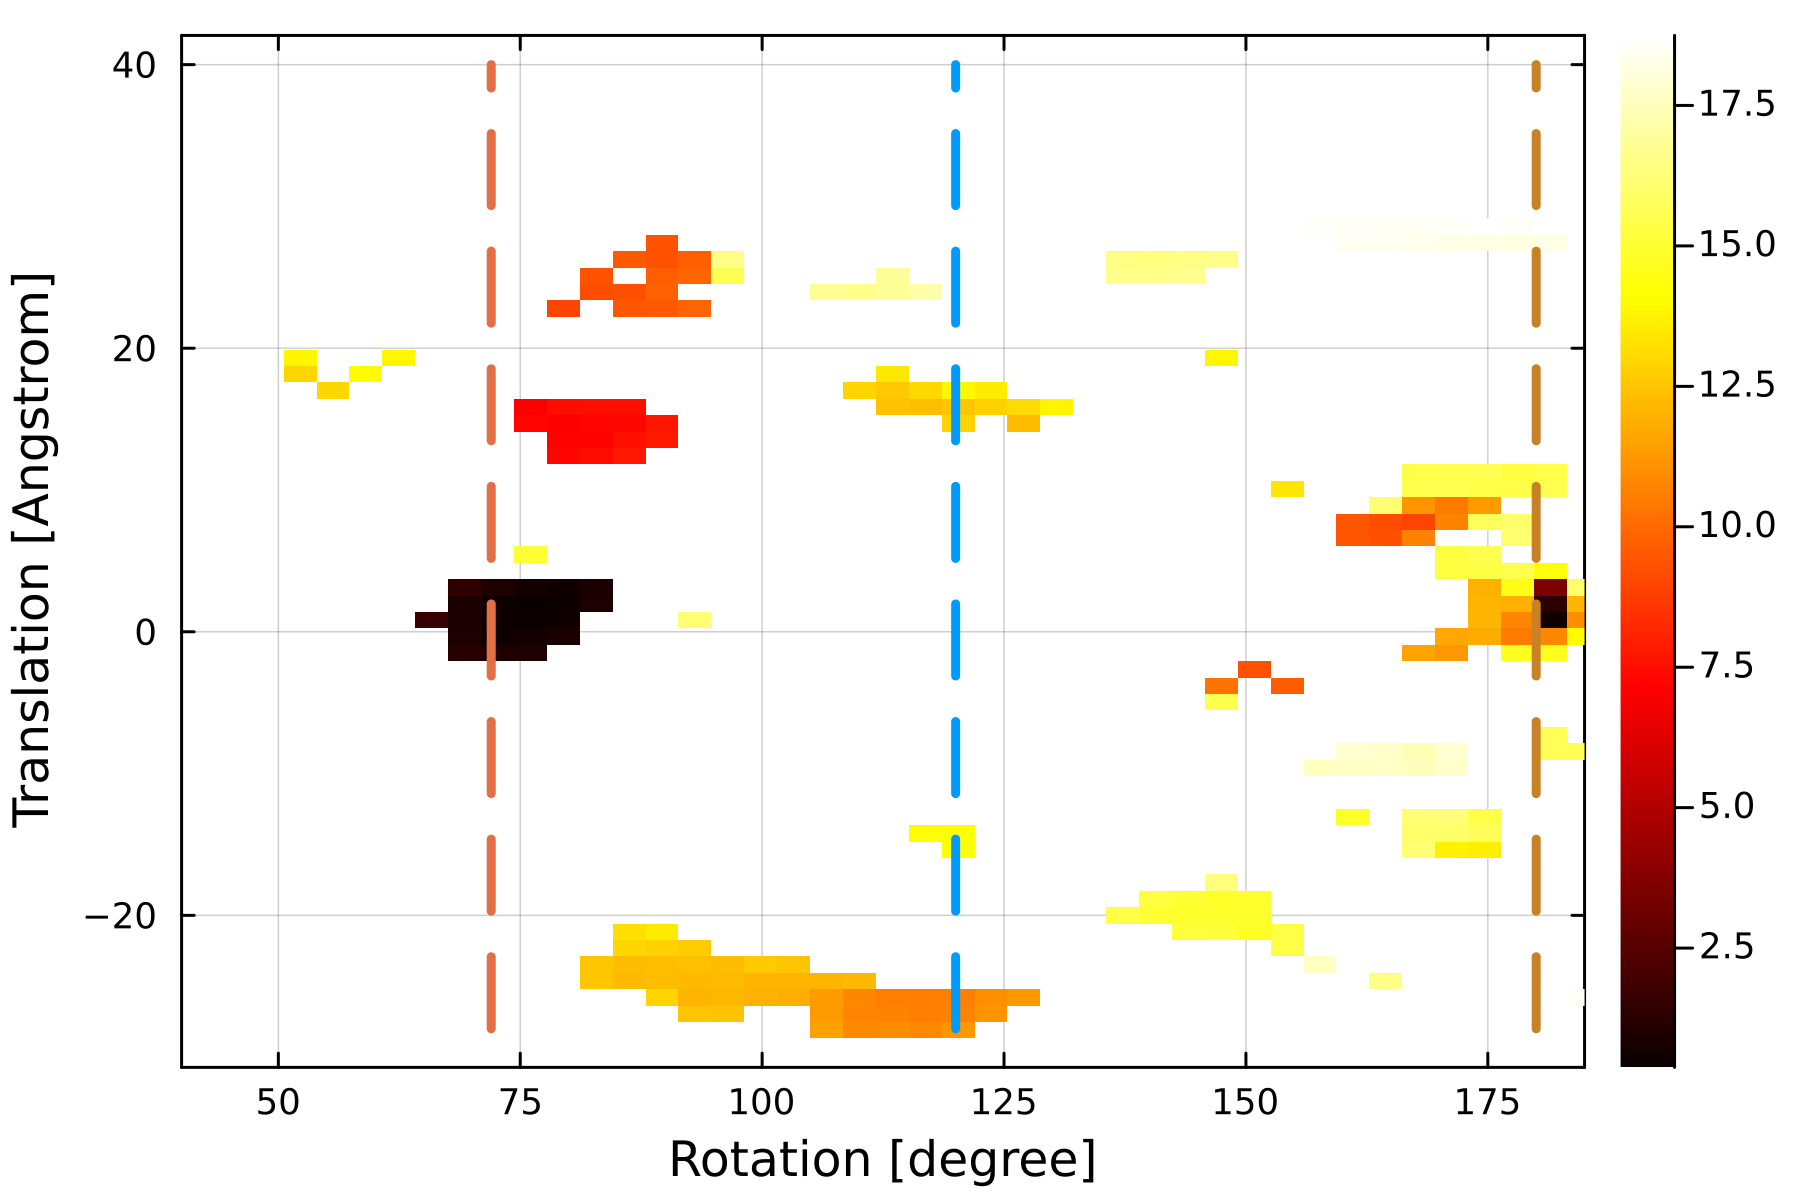

In [30]:
F = create_heatmap_min(df.phi[1:ntop], df.d[1:ntop], rmsd[1:ntop], 50, 50)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:hot,  
     st=:heatmap, levels=range(0, maximum(F.z), 10), xlim=(40, 185))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

s = collect(-28:40)
plot!(fill(360/5, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=2, label=nothing)
plot!(fill(360/3, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=1, label=nothing)
plot!(fill(360/2, length(s)), s, linestyle=:dash, linewidth=3.0, linecolor=24, label=nothing)

In [31]:
savefig(p, "heatmap_rmsd.png")
savefig(p, "heatmap_rmsd.pdf")

"/data3/yasu/capsid/docking_pairwise/1vb4_zdock_iter/heatmap_rmsd.pdf"